In [127]:
class LinearRegression(object):
    # number of iterations for gradient descent, alpha
    def __init__(self, num_iterations=10, alpha=0.0001, num_vars=2):
        self.theta = [0.] * (num_vars + 1)
        self.num_iterations = num_iterations
        self.alpha = alpha
        
    def normalize_features(self, X):
        avg = []
        ranges = []
        for i in range(len(X[0])):
            col = [x[i] for x in X]
            avg.append(sum(col) / len(X))
            ranges.append(max(col) - min(col))
        for line in X:
            for i, feature in enumerate(line):
                feature = (feature - avg[i]) / ranges[i]
        return X
            
    def train(self, data):
        history_of_cost = []
        X = [d[:-1] for d in data]
        Y = [d[-1] for d in data]
        
        X = self.normalize_features(X)
        Xvectors = [(1,) + x for x in X]

        length = len(data)
        
        # gradient descent
        for iteration in range(self.num_iterations):
            predictions = self.predict(X)

            for i, th in enumerate(self.theta):
                Xcol = [vec[i] for vec in Xvectors]
                sum_errors_for_X = sum(( Xcol[j] * (predictions[j] - Y[j]) \
                                        for j in range(length)))
                self.theta[i] = th - self.alpha*sum_errors_for_X / length
                
            cost = self.cost(self.theta, Xvectors, Y)
            #print iteration, cost
            history_of_cost.append(cost)
            
        return history_of_cost
                
    def cost(self, theta, Xvectors, Y):
        length = len(Y)
        Y_ = [sum((theta[i] * x for i, x in enumerate(X))) for X in Xvectors]
        errors = [Y_[i] - Y[i] for i in range(length)]
        return sum((e**2 for e in errors)) / 2*length
    
    
    def predict(self, test):
        out = []
        test = self.normalize_features(test)
        for point in test:
            y = self.theta[0] + \
                sum((self.theta[i + 1] * point[i] for i in range(0, len(point))))
            out.append(y)
        return out

In [128]:
%matplotlib inline
import numpy as np
data = []
with open("prices.txt") as dataset:
    for line in dataset:
        l = map(int, line.strip().split(','))
        data.append(tuple(l))
print data[:5]

[(2104, 3, 399900), (1600, 3, 329900), (2400, 3, 369000), (1416, 2, 232000), (3000, 4, 539900)]


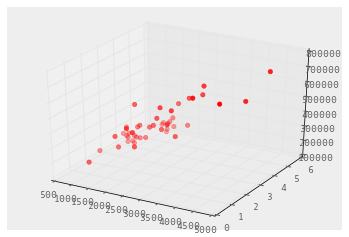

In [129]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*data), color='r')

plt.show()

In [130]:
from sklearn import cross_validation
folds = cross_validation.KFold(
    len(data), n_folds=10, random_state=0, shuffle=True)

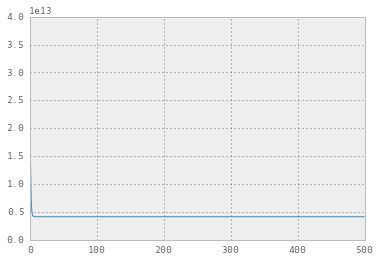

In [142]:
fold_results = []

for index, fold in enumerate(folds):
    train_indices, test_indices = fold
    TRAIN = [d for i, d in enumerate(data) if i in train_indices]
    TRAIN_PRICES = [d[-1] for i, d in enumerate(data) if i in train_indices]
    TEST = [d[:-1] for i, d in enumerate(data) if i in test_indices]
    TEST_PRICES = [d[-1] for i, d in enumerate(data) if i in test_indices]
    LR = LinearRegression(num_iterations=500, alpha=0.0000001)
    
    errors = LR.train(TRAIN)
    if index == 0:
        plt.plot(range(len(errors)), errors)
        plt.show()
   
    predicted = LR.predict(TEST)
    cost = LR.cost(LR.theta, [(1, ) + t for t in TEST], TEST_PRICES)
    fold_results.append((cost, LR.theta))


best theta - fold 6


/Users/alex/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


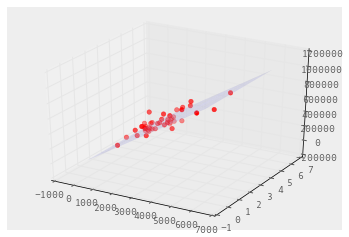

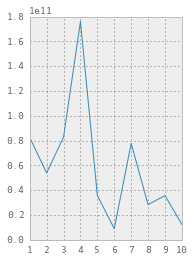

In [141]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*data), color='r')
    
import itertools, numpy as np, operator

best_fold = min(fold_results, key=operator.itemgetter(0))
LR.theta = best_fold[1]

print "best theta - fold {}".format(fold_results.index(best_fold) + 1)
X, Y = np.meshgrid(np.linspace(0, 6000, 100), np.linspace(0, 6, 100))
zs = np.array([LR.predict([[x,y]])[0] for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, color="b", alpha=0.1)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(range(1, len(fold_results) + 1), [r[0] for r in fold_results])
plt.show()